# <center>Lecture 2: Dynamic Programming</center>
## <center>Antoine Chapel (Sciences Po & PSE) </center>
## <center>Alfred Galichon's [math+econ+code](https://www.math-econ-code.org/) prerequisite class on numerical optimization and econometrics, in Python </center>
Class content by Antoine Chapel. Past and present support from Alfred Galichon's ERC grant CoG-866274 is acknowledged, as well as inputs from contributors listed [here](https://www.math-econ-code.org/team). If you reuse material from this class, please cite as:

Antoine Chapel, 'math+econ+code' prerequisite class on numerical optimization and econometrics, January 2023

#### References

* A first course in Optimization theory (Sundaram, R.), 1996
* Further Mathematics for Economic Analysis 2nd Ed (Sydsaeter et al), 2008
* Dynamic Programming and Optimal Control 4th Ed (Bertsekas), 2018 (Advanced)




## Introduction and motivation

A dynamic programming problem is an optimization problem in which decisions are taken sequentially over several time periods (Sundaram).

Typically, a dynamic optimization problem arises when actions today have consequences tomorrow. You have probably solved dynamic programming problems already, at least in problems with a finite horizon.

The specificity of DP problems is that they are set up in discrete time. Time is index with $t = 1,2,3...,T/\infty$. Two main subtypes of DP problems exist:
* Finite-Horizon Dynamic Programming (FHDP), in which time stops at $T < \infty$
* Infinite-Horizon/Stationary Dynamic Programming (SDP), in which the agents plans as if she were immortal.

Many interesting problems (such as matching), have a dynamic counterpart. Modelling, solving or estimating such problems leads in itself to technical and intellectual challenges. You should have a good understanding of dynamic programming to tackle any graduate macroeconomics class.

## Outline
* FHDP: general setup of the problem
* How to solve an FHDP
* SDP: general setup

### Finite Horizon DP
#### The general setup

Here is the general form of a FHDP problem:

\begin{align}
\max_{\{u_t\}_{t=0}^T \in U}  & \, \sum_{t=0}^T f(x_t, u_t) \\
s.t: & \ x_{t+1} = g(x_t, u_t) \\
& \ x_0 \hspace{5pt} \text{given}
\end{align}

$x_t$ is the **state** variable. A key rule of DP is that the state should contain all the information available and necessary for the agent to make the optimal decision. In the simple problems we will tackle here, $x_t$ will be a real number. $x_0$ is given: it is the inital state.

$u_t$ is the decision, called the **control** of the agent. It belongs to a set $U$. For example, in the consumption problem we are about to describe, $u$ represents consumption, and it cannot be higher than the total amount of resource available (if we exclude credit of course).

$g$ is the transition function: taking the state $x_t$ at $t$ and the decision $u_t$ at $t$ (and time) as input, it outputs the new state.

$f$ is the objective function. In economics, it is typically some measure of utility, profit, or welfare in general. It depends on time, the state, and the decision taken by the agent.

#### Example: dynamic consumption
This is the "Hello World" of Dynamic Programming for economists.
$x_t$ is the agent's wealth at time $t$. The control $u_t$ is the proportion of wealth that the agent consumes: $c_t = u_t x_t$. The remaining $(1 - u_t) x_t$ are invested and come back with an interest rate at $x_{t+1} = \rho (1 - u_t) x_t$.

### How to solve a FHDP problem.

Given the assumption that $x_t$ contains all necessary information, it should be possible, at any $t$, to define by $V(x_t)$ the **value** of being at $x$, at $t$. Let's suppose that tomorrow, at $t=s+1$, we know what the optimal control $u_t^*$ should be for $t = s+1, s+2,...,T$. Then, we could write:
\begin{align}
V(x_{s+1}) = \sum_{t=s+1}^T f(x_t, u_t^*)
\end{align}

Now, let's go back one day: today, at $t=s$. If the agent knows $V(x_{s+1})$ and the transition function $x_{s+1} = g(x_{s}, u_{s})$, the only thing the agent has to do is to find the control $u_{s}$ that maximizes
$$f(x_{s}, u_{s}) + V(g(x_{s}, u_{s}))$$

Finding this optimal control **today** is a static problem it only depends on present variables: the agent tries to find the control that maximizes his welfare today and brings him to the most favourable state **tomorrow** (the one where the value function V is highest).

Then, today if the agent knows $V(x_{s+1})$ and $\{u_t^*\}_{s+1}^T$, he can determine $u_s^*$. Then, he can compute $V(x_s)$, which allows him to go still one day earlier, determine the optimal control then, and so on. This is the fundamental equation of Dynamic Programming, that allows us to write sequentially what would otherwise be a diffult problem:

\begin{align}
V(x_t) = max_{u_t \in U} \Big[ f(x_t, u_t) + V( x_{t+1} ) \Big]
\end{align}

To solve this type of problem, you need to start from the last point in time: at $t=T$ there is no tomorrow, so the agent just optimizes for today: $V(x_T) = max_{u_T \in U} f(x_T, u_T)$. Then, you go one day before and solve for $u_{T-1}^*$ by optimizing as shown. This process of moving backwards in time to solve a sequential problem is called **backwards induction**.


Exercise: solve the following FHDP problem (taken from Sydsaeter et al):
        
\begin{align}
max_u \sum_{t=0}^2 (1 + x_t - u_t^2), \\
x_{t+1} &= x_t + u_t, \\
x_0 &= 0, \\
u_t &\in \mathbb{R}
\end{align}


$t=2: \hspace{10pt} V(x_T) = \max_{u_2} 1 + x_2 - u_2^2$

Clearly, $u_2^* = 0$. So, $V(x_T) = 1 + x_2^*$

$t=1: \hspace{10pt} V(x_1) = \max_{u_1} 1 + x_1 - u_1^2 + V(x_T)$

$ \hspace{60pt} = \max_{u_1} 1 + x_1 - u_1^2 + 1 + x_2$

$ \hspace{60pt} = \max_{u_1} 1 + x_1 - u_1^2 + 1 + x_1 + u_1$

FOC: $-2u_1 + 1 = 0 \Leftrightarrow u_1^* = \frac{1}{2}$ (Concavity is trivial)

$\Rightarrow V(x_1) = 1 + x_1^* - \frac{1}{4} + 1 + x_1^* + \frac{1}{2} = 2 x_1^* + \frac{9}{4}$


$t=0: \hspace{10pt} V(x_0) = \max_{u_0} 1 + x_0 - u_0^2 + 2x_1^* + \frac{9}{4}$

$ \hspace{60pt} =  \max_{u_0} 1 + x_0 - u_0^2 + 2(x_0 + u_0) + \frac{9}{4}$

FOC: $-2u_0 + 2 = 0 \Leftrightarrow u_0^* = 1$ (Concavity is trivial again)

So, given the initial state $x_0=0$, the optimal sequence of actions and states is the following:
* $t=0$: $x_0=0$, $u_0^* = 1$
* $t=1$: $x_1=1$, $u_1^* = \frac{1}{2}$
* $t=2$: $x_2=\frac{3}{2}$, $u_2^* = \frac{1}{4}$

## Stationary Dynamic Programming

Conceiving dynamic programming at an infinite horizon requires a bit of a conceptual jump from finite horizon dynamic programming.

First, why is it called "stationary" ? If an agent lives forever, he is free from a strategic use of the time, and therefore he will find an optimal consumption level, and a consumption rule that allows him to reach that optimal consumption level and, in a way, remain there.

### General setup
\begin{align}
\max_{\{u_t\}_{t=0}^T \in U}  & \, \sum_{t=0}^{\infty} \beta^t f(x_t, u_t) \\
s.t: & \ x_{t+1} = g(x_t, u_t) \\
& \ x_0 \hspace{5pt} \text{given}
\end{align}


This is very close to the finite setting. The modifications is that now, the agent optimizes an infinite sum. To avoid that this infinite sum diverges to $+\infty$, the future flows of utility are discounted with $\beta \in (0,1)$. This way, at moment $t$, if $\beta=0.8$, utility today is weighted $\beta^0 = 1$, utility tomorrow is weighted $\beta^1 = 0.8$, after tomorrow $\beta^2 = 0.64$, etc. The higher $\beta$, the more **patient** the agent is.

Since the behaviour is stationary, the goal of SDP is to find a fixed **policy function** $h$, a function that takes the state as input, and returns a value for the control. The goal is that, once this policy function is known, the whole system can be simulated with the policy function and the transition function: $u_t = h(x_t)$ and $x_{t+1} = g(x_t, u_t)$, starting from any $x_0$ given.

#### Rewriting the SDP problem as a sequential problem:

Let us suppose that we are at time $t = 0$. The problem that the agent has to solve is the following:

\begin{align}
V(x_0) = \max & \, \sum_{t=0}^{\infty} \beta^t f(x_t, u_t) \\
= \max & \, f(x_0, u_0) + \sum_{t=1}^\infty \beta^t f(x_t, u_t) \\
= \max & \, f(x_0, u_0) + \beta \sum_{t=1}^\infty \beta^{t-1} f(x_t, u_t) \\
= \max & \, f(x_0, u_0) + \beta V(x_1)
\end{align}


Since the problem is stationary, the time indexes do not matter: we can denote $x$ for any $x_t$ and $x'$ for any $x_{t+1}$


\begin{align}
V(x) = \max f(x, u) + \beta V(x')
\end{align}

## Value Function Iteration

Solving this sort of problem requires a numerical procedure called Value Function Iteration. It is instrumental in macro models such as DSGE. Here, we will see the non-stochastic version of that model.
Consider you want to maximize the following problem: 

\begin{align}
\max_{\{c_t\}_{t=0}^{\infty}}  & \, \sum_{t=0}^{\infty} \beta^t u(c_t) \\
s.t: & \ k_{t+1} + c_{t} = f(k_t) \\
& \ k_0 \hspace{5pt} \text{given}
\end{align}

At every period, the agents "looks" at his stock of capital, and decides how much to consume based on this. So, the "state" is capital $k$. The problem can be written recursively as follows:

\begin{align}
V(k_0) = \max_{\{0 < k_1 < f(k_0)\}_{t=0}^{\infty}} \{ u\Big(f(k_0) - k_1\Big) + \beta V(k_1)\}
\end{align}

Since the problem is infinite horizon, the solution (if it exists) is stationary: what is valid for some $k_0$ and $k_1$ (taken arbitrarily as a starting point between $-\infty$ and $+\infty$, must be valid for any $k$ and $k'$. Also, to have a specific functional form for $f$ and $u$ in mind, we rewrite the problem:

\begin{align}
V(k) = \max_{\{0 < k' < A(k^\alpha)\}_{t=0}^{\infty}} \{ \log(Ak^\alpha - k') + \beta V(k')\}
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

kmax = 30
precision=200

kgrid = np.linspace(1, kmax, precision)
gk = np.linspace(1, kmax, precision)
Vk0 = np.ones(precision)

A=10
α=0.5
β=0.9

norm = 1e5
tol = 1e-5
maxiter=1000
n_iter=0


Vk = Vk0
while n_iter < maxiter and norm > tol:
    value_array = np.empty((precision, precision))
    
    for iprim, kprim in enumerate(kgrid):
        for i, k in enumerate(kgrid):
            c = A*(k**α) - kprim
            if c > 0:
                value_array[i, iprim] = np.log(c) + β*Vk[iprim] 
            else:
                value_array[i, iprim] = -np.inf
                
    Vkprim = np.empty(precision)
    for row in range(value_array.shape[1]):
        gk[row] = kgrid[int(np.argmax(value_array[row, :]))]
        Vkprim[row] = np.max(value_array[row, :])
    
    norm = np.max(np.abs(Vkprim - Vk))
    Vk = Vkprim
    
    n_iter += 1
    print("iteration: ", n_iter, " norm: ", norm)

iteration:  1  norm:  3.884757641783117
iteration:  2  norm:  2.882083935801659
iteration:  3  norm:  2.5089908990608283
iteration:  4  norm:  2.2329620751402928
iteration:  5  norm:  2.000399429882627
iteration:  6  norm:  1.7965668564188917
iteration:  7  norm:  1.615285261725461
iteration:  8  norm:  1.4530296087434174
iteration:  9  norm:  1.307415874014488
iteration:  10  norm:  1.1765199082665276
iteration:  11  norm:  1.058803635426532
iteration:  12  norm:  0.9528926646095286
iteration:  13  norm:  0.8575913772309605
iteration:  14  norm:  0.7718319480552651
iteration:  15  norm:  0.694641689662955
iteration:  16  norm:  0.6251775206966599
iteration:  17  norm:  0.5626597686269932
iteration:  18  norm:  0.506393791764296
iteration:  19  norm:  0.455754412587865
iteration:  20  norm:  0.4101789713290813
iteration:  21  norm:  0.36916107419617816
iteration:  22  norm:  0.33224496677656035
iteration:  23  norm:  0.29902047009890254
iteration:  24  norm:  0.2691184230890151
iterati

In [2]:
kstar = kgrid[np.argmin(np.abs(gk - kgrid))]

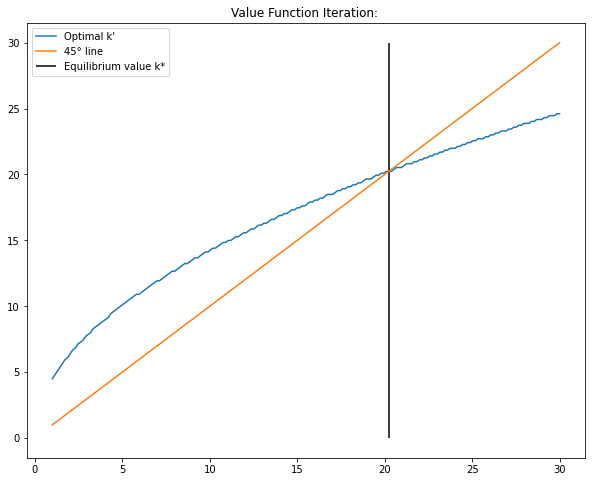

In [3]:
plt.rcParams["figure.figsize"] = (10, 8)

plt.plot(kgrid, gk, label="Optimal k'")
plt.plot(kgrid, kgrid, label="45° line")
plt.vlines(kstar, ymin=0, ymax=30, label="Equilibrium value k*")

plt.title("Value Function Iteration: ")
plt.legend()
plt.show()

How to interpret this ? The blue line describes, for each $k_t$ on the horizontal axis, what should be the optimal $k_{t+1}$. When both coincide, this is the steady state: it gives the equilibrium value of capital $k^*$. The algorithm we used, VFI, is a type of a **fixed-point** algorithm. We started from a random $Vk0$ (which is not the blue line !) and computed present values pretending $Vk0$ was $V(k')$. Then, we looked at where the present values are the highest (optimization process) for every $k$ (line 36), and replaced our random $VkV0$ by that optimized $V(k')$. Of course it's still wrong, but if we repeat this procedure enough times, we can get arbitrarily close the the true $V(k')$.

Dynamic Programming also has a stochastic extension, in which the state transition involves probabilities. In such settings, the number of possible states can very quickly explode and become intractable: that's called the **curse of dimensionality**. Algorithms from the Artificial Intelligence literature are strongly connected to the ones we presented here (think of the position of pieces on the chess board as being the state, and the control as being the move that can be made by the chess player).

If you are interested in these topics, you are invited to take a look at Dimitri Bertsekas's website, and especially his [work on Dynamic Programming](http://www.athenasc.com/dpbook.html)